Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [37]:
import timeit
import random

#creating the necessary variables
eps = 1e-16
N = 10000
#these correspond to the first,midlle and the last values in the list
locations = [0.0, 0.5, 1.0 - eps]

#this function compares the first, middle and last numbers and returns the one which is in the middle.
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        #here if none of the previous statements are correct then x1 must be the median
        return x1
def qsort(lst):
    #creating a list of indices
    indices = [(0, len(lst))]
    #while the list of indices is not empty
    while indices:
        #returning the last item form the indices list
        (frm, to) = indices.pop()
        #if those two indices are equal then starting from the beggining of the while statement
        if frm == to:
            continue
        # Find the partition:
        #finding the length of the list between two indeces
        N = to - frm
        #finding the indexes of three parts of the list - first, middle or last index of the list
        inds = [frm + int(N * n) for n in locations]
        #this line returns the exacts values of under the corresponding indeces in the list
        values = [lst[ind] for ind in inds]
        #returning the median of the three numbers we just found
        partition = median(*values)
        #splitting the original list depending on whether the number is smaller or bigger then the pivot
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        #counting how many numbers are equal to the pivot
        counts = sum([1 for a in lst[frm:to] if a == partition])
        #counting numbers that are smaller then the pivot and bigger than it
        ind1 = frm + len(lower)
        ind2 = ind1 + counts
        #push the numbers back into correct places:
        lst[frm:ind1] = lower
        #this line puts all of the numbers that are equal to the pivot between the lower and upper sublists
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper
        #Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort():
    #create a new list that consists of N numbers - this is a sorted in an ascending list
    lst = [i for i in range(N)]
    #shuffling the list 
    random.shuffle(lst)
    #using the previous function to sort it
    return qsort(lst)

#testing if the test_quicksort works by comparing the sorted list to the which we sorted using randomized_quicksort
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])

# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))


0.1128459159990598


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

In Cormen et al. the author suggested picking a random pivot at each iteration to achieve a balanced division of the list. In this code, however, we just randomly shuffle the list before we sort it to make sure that the numbers are distributed randomly which will make sure that the division is likely to be balanced.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [38]:
def randomized_qsort(lst):
    #shuffling the list 
    random.shuffle(lst)
    #using the previous function to sort it
    return qsort(lst)

In [39]:
import time
import statistics 
t1 = []
t1_1 = []

for k in range(1,200):
    list_k = []
    for i in range(10*k):
        list_k.append(i)
    for n in range(10):    
        a = time.time()
        randomized_qsort(list_k)
        b = time.time()
        t1_1.append(b-a)
    t1.append(statistics.mean(t1_1))
    t1_1 = []

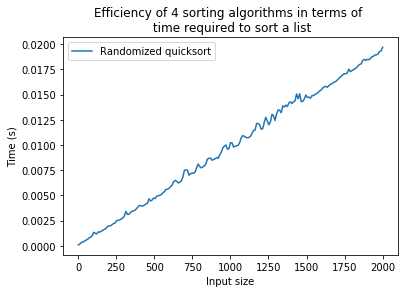

In [40]:
import matplotlib.pyplot as plt
import numpy as np
x = list(np.linspace(1,2000,199))

plt.plot(x,t1,label = "Randomized quicksort")
plt.title("Efficiency of 4 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [73]:
eps = 1e-16
#these correspond to the first,midlle and the last values in the list
locations = [0.0, 0.5, 1.0 - eps]

def qsort(lst):
    #creating a list of indices
    indices = [(0, len(lst))]
    #while the list of indices is not empty
    while indices:
        #returning the last item form the indices list
        (frm, to) = indices.pop()
        #if those two indices are equal then starting from the beggining of the while statement
        if frm == to:
            continue
        # Find the partition:
        #finding the length of the list between two indeces
        N = to - frm
        #finding the indexes of three parts of the list - first, middle or last index of the list
        inds = [frm + int(N * n) for n in locations]
        print(inds)
        #this line returns the exacts values of under the corresponding indeces in the list
        values = [lst[ind] for ind in inds]
        print("__",values)
        #returning the median of the three numbers we just found
        partition = median(*values)
        #splitting the original list depending on whether the number is smaller or bigger then the pivot
        lower = [a for a in lst[frm:to] if a <= partition]
        upper = [a for a in lst[frm:to-1] if a > partition]
        #counting how many numbers are equal to the pivot
        #counting numbers that are smaller then the pivot and bigger than it
        ind1 = frm + len(lower)
        ind2 = ind1 + 1
        #push the numbers back into correct places:
        lst[frm:ind1] = lower
        #this line puts all of the numbers that are equal to the pivot between the lower and upper sublists
        lst[ind2:to] = upper
        #Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort(lst):
    #create a new list that consists of N numbers - this is a sorted in an ascending list
    #shuffling the list 
    random.shuffle(lst)
    #using the previous function to sort it
    return qsort(lst)

In [74]:
randomized_quicksort([2,5,7,9,1,2,-4])

[0, 3, 6]
__ [2, 9, 1]
[5, 6, 6]
__ [5, 7, 7]
[5, 5, 5]
__ [5, 5, 5]
[7, 7, 7]
__ [9, 9, 9]
[8, 7, 7]


IndexError: list index out of range

In [57]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

IndexError: list index out of range

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [81]:
def qsort2(lst):
    #creating a list of indices
    indices = [(0, len(lst))]
    #while the list of indices is not empty
    while indices:
        #returning the last item form the indices list
        (frm, to) = indices.pop()
        #if those two indices are equal then starting from the beggining of the while statement
        if frm == to:
            continue
        
        #eliminating the median function and just using the first element
        partition = lst[frm]
        #splitting the original list depending on whether the number is smaller or bigger then the pivot
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        #counting how many numbers are equal to the pivot
        counts = sum([1 for a in lst[frm:to] if a == partition])
        #counting numbers that are smaller then the pivot and bigger than it
        ind1 = frm + len(lower)
        ind2 = ind1 + counts
        #push the numbers back into correct places:
        lst[frm:ind1] = lower
        #this line puts all of the numbers that are equal to the pivot between the lower and upper sublists
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper
        #Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_qsort2(lst):
    #shuffling the list 
    random.shuffle(lst)
    #using the previous function to sort it
    return qsort2(lst)

In [82]:
randomized_qsort2([2,6,5,4,9,5,3,-2,7])

[-2, 2, 3, 4, 5, 5, 6, 7, 9]

In [83]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

[0, 1, 1]
[3, 3, 3]


IndexError: list index out of range

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [84]:
t2 = []
t2_1 = []

for k in range(1,200):
    list_k = []
    for i in range(10*k):
        list_k.append(i)
    for n in range(10):    
        a = time.time()
        randomized_qsort2(list_k)
        b = time.time()
        t2_1.append(b-a)
    t2.append(statistics.mean(t2_1))
    t2_1 = []

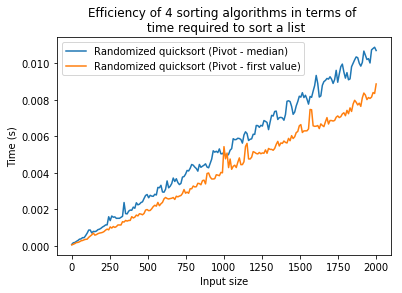

In [85]:
import matplotlib.pyplot as plt
import numpy as np
x = list(np.linspace(1,2000,199))

plt.plot(x,t1,label = "Randomized quicksort (Pivot - median)")
plt.plot(x,t2,label = "Randomized quicksort (Pivot - first value)")
plt.title("Efficiency of 4 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")

As we can see, the run time of the median-pivot quick sort grows faster which makes sense given that median of three is used to prevent the worst case, however since we randomize the input, the partitioning will already be balanced, so finding a median is an unnecessary step which increases the run time.

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


In order to estimate the max input we need to make certain assumptions - for example, we will assume that the partitions are always balanced. This allows us to make an equation that will be valid for any input because at each iteration the list will be separated into two. We can create an equation that allows us to find the number of levels before we reach a base case: n/2^k = 1. By rearranging it we get k = logn. (the base is 2, since we divide the list into two. Further we can plug in 500 instead of k (given that we can have 500 levels/recursions) and solve for n: n = 2^500. Therefore, the max input is approximately 2^500. 